# Data loading 
Next cells are used to load the data we need.

In [1]:
import pandas as pd
import numpy as np 
import scipy.sparse as sps
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('..')


In [2]:
#data which contains users (row), items(col) and implicit interaction (data)
dataset = pd.read_csv('data_train.csv')
dataset

,row,col,data
0,0,10080,1.0
1,0,19467,1.0
2,1,2665,1.0
3,1,7494,1.0
4,1,17068,1.0
...,...,...,...
113263,7945,2476,1.0
113264,7945,12319,1.0
113265,7945,21384,1.0
113266,7946,8699,1.0


# Data pre-processing
Pre-processing of data to check for missing users, items ecc...

In [3]:
users = dataset.row
items = dataset.col
data = dataset.data
URM_all = sps.coo_matrix((data, (users, items)))
URM_all = URM_all.tocsr() #fast row access -> fast access to users 
URM_all.shape

(7947, 25975)

In [4]:
ICM_df = pd.read_csv('data_ICM_title_abstract.csv')
ICM_df

,row,col,data
0,0,1185,1.015524
1,0,2507,0.459024
2,0,3534,0.227742
3,0,8766,0.501549
4,0,10862,0.297011
...,...,...,...
490686,25974,12554,0.963016
490687,25974,13003,0.104613
490688,25974,16236,0.118760
490689,25974,18797,0.363301


In [5]:
items = ICM_df.row
features = ICM_df.col
data = ICM_df.data
ICM_all = sps.coo_matrix((data, (items, features)))
ICM_all = ICM_all.tocsr() #fast row access -> fast access to users 
ICM_all.shape

(25975, 20000)

In [6]:
from Base.Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

#splitting data into train and validation (from the previous training data)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85)

In [7]:
URM_all

<7947x25975 sparse matrix of type '<class 'numpy.float64'>'
	with 113268 stored elements in Compressed Sparse Row format>

In [8]:
ICM_all

<25975x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 490691 stored elements in Compressed Sparse Row format>

In [9]:
#evaluator for validation (used for hyperparameter tuning)
evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])

In [10]:
from GraphBased.RP3betaRecommender import RP3betaRecommender

recommender = RP3betaRecommender(URM_train)

RP3betaRecommender: URM Detected 43 (0.54 %) cold users.
RP3betaRecommender: URM Detected 2029 (7.81 %) cold items.


In [11]:
x_tick = []
collaborative_MAP = []

for topK in [10,50,60,70,80]:
    for alpha in [0.2, 0.5, 0.7, 0.9, 1.5]:
        for beta in [0.0.2, 0.5]:
            x_tick.append("topk {}, alpha{}, beta{}".format(topK,alpha,beta))

            recommender = RP3betaRecommender(ICM_all.T)

            recommender.fit(topK=topK, alpha=alpha, beta=beta, implicit=False)
            recommender.URM_train = URM_train

            result_dict, _ = evaluator_validation.evaluateRecommender(recommender)

            collaborative_MAP.append(result_dict[10]["MAP"])

RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 3.52 sec. Users per second: 1417
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 3.55 sec. Users per second: 1404
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 3.52 sec. Users per second: 1416
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 3.78 sec. Users per second: 1321
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 3.42 sec. Users per second: 1460
RP3betaRecommender: URM Detect

EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.47 sec. Users per second: 1117
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.34 sec. Users per second: 1151
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.42 sec. Users per second: 1131
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 3.73 sec. Users per second: 1339
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.09 sec. Users per second: 1220
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 49

RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.24 sec. Users per second: 1177
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 5.52 sec. Users per second: 904
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.52 sec. Users per second: 1105
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 5.22 sec. Users per second: 957
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.29 sec. Users per second: 1164
RP3betaRecommender: URM Detected

EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.23 sec. Users per second: 1180
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.04 sec. Users per second: 1236
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 3.82 sec. Users per second: 1307
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.17 sec. Users per second: 1196
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 4992 ( 100.00% ) in 4.32 sec. Users per second: 1154
RP3betaRecommender: URM Detected 2 (0.01 %) cold users.
RP3betaRecommender: URM Detected 25 (0.10 %) cold items.
EvaluatorHoldout: Processed 49

In [12]:
import operator
index, value = max(enumerate(collaborative_MAP), key=operator.itemgetter(1))
print(index, value)
parameters = x_tick[index]
print(parameters)

1 0.03791458368537047
topk 70, alpha0.2, beta0.5


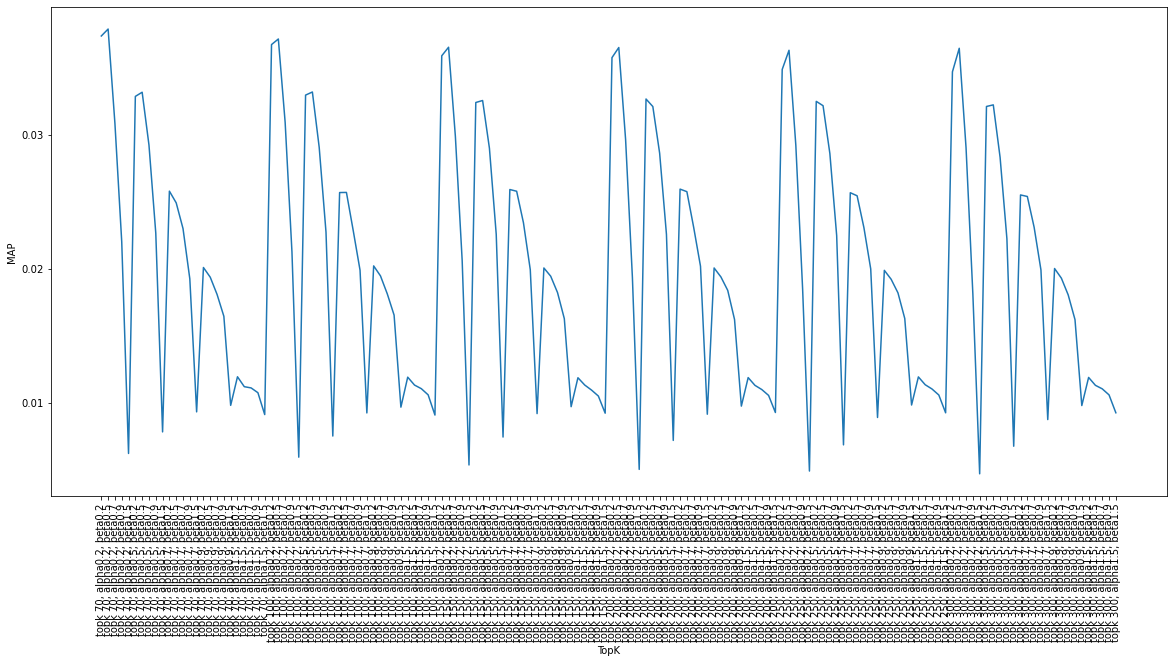

In [13]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1, 1, figsize=(20, 9))
plt.plot(x_tick, collaborative_MAP, label="Collaborative")
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.ylabel('MAP')
plt.xlabel('TopK')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
test_users = pd.read_csv('data_target_users_test.csv')
test_users

In [ ]:
# best model itemCBF topk 600, shrink200, weightTF-IDF

recommender = ItemKNNCBFRecommender(URM_all, ICM_all)
recommender.fit(topK=600, shrink=200, feature_weighting = 'TF-IDF')

user_id = test_users['user_id']
recommendations = recommender.recommend(user_id,cutoff = 10)


In [ ]:
for index in range(len(recommendations)):
    #print(element)
    recommendations[index]=np.array(recommendations[index])
    #print(type(element))
print(len(recommendations))

In [ ]:
test_users['item_list']= recommendations
#test_users['item_list'] =  test_users['item_list'].apply(lambda x: x.replace('[','').replace(']','')) 
test_users['item_list'] = pd.DataFrame([str(line).strip('[').strip(']').replace("'","") for line in test_users['item_list']])

#convert the string columns to int
#test_users['item_list'] = test_users['item_list'].astype(int)
test_users
test_users.to_csv('submission.csv', index=False)
